In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils_new as util
from construct_model_matrices_test import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
DATA_DIR = '../../data/Xy_random_split_data'
TEST = False

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR, TEST)
matrix_constructor.construct_model_matrices()

Loading data from ['X_train_1998.csv', 'X_train_1999.csv', 'X_train_2000.csv', 'X_train_2001.csv', 'X_train_2002.csv', 'X_train_2003.csv', 'X_train_2004.csv', 'X_train_2005.csv', 'X_train_2006.csv', 'X_train_2007.csv', 'X_train_2008.csv', 'X_train_2009.csv', 'X_train_2010.csv', 'X_train_2011.csv', 'X_train_2012.csv', 'X_train_2013.csv', 'X_train_2014.csv', 'X_train_2015.csv']...
Loading data from ['X_valid_1998.csv', 'X_valid_1999.csv', 'X_valid_2000.csv', 'X_valid_2001.csv', 'X_valid_2002.csv', 'X_valid_2003.csv', 'X_valid_2004.csv', 'X_valid_2005.csv', 'X_valid_2006.csv', 'X_valid_2007.csv', 'X_valid_2008.csv', 'X_valid_2009.csv', 'X_valid_2010.csv', 'X_valid_2011.csv', 'X_valid_2012.csv', 'X_valid_2013.csv', 'X_valid_2014.csv', 'X_valid_2015.csv']...
Loading data from ['X_test_1998.csv', 'X_test_1999.csv', 'X_test_2000.csv', 'X_test_2001.csv', 'X_test_2002.csv', 'X_test_2003.csv', 'X_test_2004.csv', 'X_test_2005.csv', 'X_test_2006.csv', 'X_test_2007.csv', 'X_test_2008.csv', 'X_test_

In [52]:
test_vars = matrix_constructor.get_variables(random=False)
test_vars = sorted(test_vars)
for var in ['x', 'y', 'year']:
    test_vars.append(var)
test_vars

fixed: ['vgt', 'sum9_diff_cub', 'lon:Acs', 'sum9_t1:sum9_t2', 'etopo1_sq', 'etopo1:cwd', 'lat:Acs', 'btl_t2', 'sum9_t2', 'lon', 'sum9_diff', 'etopo1:sum9_diff', 'etopo1:mi', 'lat:cwd', 'lat_sq', 'lon:cwd', 'lat_cub', 'lat:vpd', 'etopo1', 'lon:sum9_diff', 'sum9_t1', 'btl_t1:btl_t2', 'lat:wd', 'sum9_diff_sq', 'lat:mi', 'etopo1:Acs', 'lon:lat:etopo1', 'etopo1:vpd', 'etopo1:PPT', 'lat:PPT', 'lat', 'lon:PPT', 'etopo1:wd', 'lon:mi', 'lon:wd', 'lon_cub', 'lat:sum9_diff', 'lon:vpd', 'btl_t1']
variables: ['AugTmax', 'ddAugJul', 'summerP2', 'MarMin', 'Mar20', 'JanTmin', 'PMarAug', 'Tvar', 'summerTmean', 'AugMaxT', 'wd', 'OctTmin', 'TMarAug', 'AugTmean', 'Pmean', 'MarTmin', 'minT', 'vpd', 'OptTsum', 'PPT', 'JanMin', 'POctSep', 'summerP1', 'PcumOctSep', 'Jan20', 'OctMin', 'ddAugJun', 'maxT', 'fallTmean', 'max.drop', 'mi', 'Tmin', 'TOctSep', 'summerP0', 'cwd', 'winterMin', 'Tmean', 'Acs']


['Acs',
 'AugMaxT',
 'AugTmax',
 'AugTmean',
 'Jan20',
 'JanMin',
 'JanTmin',
 'Mar20',
 'MarMin',
 'MarTmin',
 'OctMin',
 'OctTmin',
 'OptTsum',
 'PMarAug',
 'POctSep',
 'PPT',
 'PcumOctSep',
 'Pmean',
 'TMarAug',
 'TOctSep',
 'Tmean',
 'Tmin',
 'Tvar',
 'btl_t1',
 'btl_t1:btl_t2',
 'btl_t2',
 'cwd',
 'ddAugJul',
 'ddAugJun',
 'etopo1',
 'etopo1:Acs',
 'etopo1:Acs',
 'etopo1:AugMaxT',
 'etopo1:AugTmax',
 'etopo1:AugTmean',
 'etopo1:Jan20',
 'etopo1:JanMin',
 'etopo1:JanTmin',
 'etopo1:Mar20',
 'etopo1:MarMin',
 'etopo1:MarTmin',
 'etopo1:OctMin',
 'etopo1:OctTmin',
 'etopo1:OptTsum',
 'etopo1:PMarAug',
 'etopo1:POctSep',
 'etopo1:PPT',
 'etopo1:PPT',
 'etopo1:PcumOctSep',
 'etopo1:Pmean',
 'etopo1:TMarAug',
 'etopo1:TOctSep',
 'etopo1:Tmean',
 'etopo1:Tmin',
 'etopo1:Tvar',
 'etopo1:cwd',
 'etopo1:cwd',
 'etopo1:ddAugJul',
 'etopo1:ddAugJun',
 'etopo1:fallTmean',
 'etopo1:max.drop',
 'etopo1:maxT',
 'etopo1:mi',
 'etopo1:mi',
 'etopo1:minT',
 'etopo1:sum9_diff',
 'etopo1:summerP0',
 '

In [5]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [98]:
data_sets = matrix_constructor.select_variables(test_vars)
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)
    
X_train.head()

Train:
 X: (789475, 194)
 y: (789475, 1)
Valid:
 X: (98876, 194)
 y: (98876, 1)
Test:
 X: (99183, 194)
 y: (99183, 1)


,Acs,AugMaxT,AugTmax,AugTmean,Jan20,JanMin,JanTmin,Mar20,MarMin,MarTmin,...,summerP1,summerP2,summerTmean,vgt,vpd,wd,winterMin,x,y,year
0,0.0,38.752094,36.091501,27.502499,0,-7.478265,-0.805385,0,-5.356053,4.376215,...,117.425140,260.620229,26.963603,0,366937.690852,11.790140,-8.064639,-450000.0,-2040000.0,2015
1,0.0,36.743772,33.994497,25.295415,0,-7.273205,-2.191895,0,-5.843041,2.200347,...,145.925704,318.327508,24.755350,0,320657.267566,48.674129,-8.693665,-440000.0,-2040000.0,2015
2,0.0,37.632520,35.397027,26.787834,0,-7.500000,-1.377182,0,-5.443481,3.525477,...,126.445372,280.075993,26.213616,0,334804.068208,60.135742,-8.585368,-430000.0,-2040000.0,2015
3,0.0,38.558851,35.949109,27.379772,0,-7.500000,-1.161289,0,-5.006946,4.101569,...,115.983417,259.864216,26.805074,0,350649.461883,57.758161,-8.490052,-420000.0,-2040000.0,2015
4,0.0,39.136888,36.350756,27.771246,0,-7.501845,-0.944256,0,-5.000000,4.428590,...,107.539114,243.690708,27.196394,0,360183.639481,63.650985,-8.365362,-410000.0,-2040000.0,2015


In [7]:
max(X_test.x), max(X_test.y)

(-140000.0, 1540000.0)

In [8]:
test_vars[1]

'AugMaxT'

In [9]:
year = 2009

In [10]:
var = test_vars[1]
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == year, :], var)
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == year, :], var)
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == year, :], var)

matrix shape: (195, 357)
matrix shape: (192, 355)
matrix shape: (196, 350)


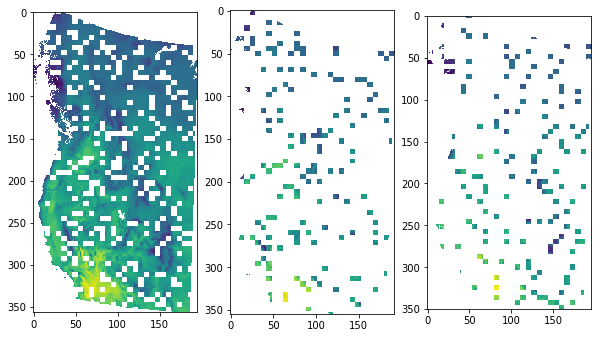

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [53]:
def merge_Xy(data_sets):
    out = []
    for data_set in data_sets:
        X, y = data_set[0].copy(), data_set[1].copy()
        X['btl'] = y
        out.append(X)
    return out

In [99]:
[merge_train, merge_valid, merge_test] = merge_Xy(data_sets)

In [14]:
btl_matrix_train = util.column2matrix(
    merge_train.loc[merge_train.year == year, :],'btl')
btl_matrix_valid = util.column2matrix(
    merge_valid.loc[merge_valid.year == year, :],'btl')
btl_matrix_test = util.column2matrix(
    merge_test.loc[merge_test.year == year, :],'btl')

matrix shape: (195, 357)
matrix shape: (192, 355)
matrix shape: (196, 350)


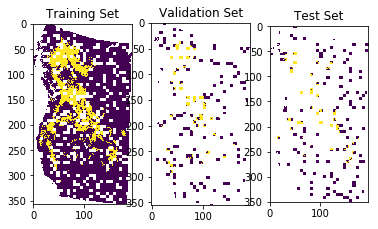

In [15]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [100]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 12.92%
Percent presence in y_valid: 13.93%
Percent presence in y_test: 12.60%


In [17]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 12.92)
print('  valid:', 100 - 13.93)
print('  test: ', 100 - 12.60)

Baseline accuracy if predicting "absent" for all cells:
  train: 87.08
  valid: 86.07
  test:  87.4


In [101]:
y_train.columns=['btl']
y_valid.columns=['btl']
y_test.columns=['btl']

In [102]:
y_train.head()

,btl
0,0
1,0
2,0
3,0
4,0


In [103]:
full_train = merge_train.copy()
full_valid = merge_valid.copy()
full_test = merge_test.copy()

In [104]:
#drop = ['x', 'y', 'year']
drop = ['x', 'y', 'year', 'vgt', 'lon', 'lat', 'etopo1', 'lon_cub', 'lat_sq', 'lat_cub', 'etopo1_sq', 'lon:lat:etopo1']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [105]:
predictors = list(X_train)
predictors

['Acs',
 'AugMaxT',
 'AugTmax',
 'AugTmean',
 'Jan20',
 'JanMin',
 'JanTmin',
 'Mar20',
 'MarMin',
 'MarTmin',
 'OctMin',
 'OctTmin',
 'OptTsum',
 'PMarAug',
 'POctSep',
 'PPT',
 'PcumOctSep',
 'Pmean',
 'TMarAug',
 'TOctSep',
 'Tmean',
 'Tmin',
 'Tvar',
 'btl_t1',
 'btl_t1:btl_t2',
 'btl_t2',
 'cwd',
 'ddAugJul',
 'ddAugJun',
 'etopo1:Acs',
 'etopo1:Acs',
 'etopo1:AugMaxT',
 'etopo1:AugTmax',
 'etopo1:AugTmean',
 'etopo1:Jan20',
 'etopo1:JanMin',
 'etopo1:JanTmin',
 'etopo1:Mar20',
 'etopo1:MarMin',
 'etopo1:MarTmin',
 'etopo1:OctMin',
 'etopo1:OctTmin',
 'etopo1:OptTsum',
 'etopo1:PMarAug',
 'etopo1:POctSep',
 'etopo1:PPT',
 'etopo1:PPT',
 'etopo1:PcumOctSep',
 'etopo1:Pmean',
 'etopo1:TMarAug',
 'etopo1:TOctSep',
 'etopo1:Tmean',
 'etopo1:Tmin',
 'etopo1:Tvar',
 'etopo1:cwd',
 'etopo1:cwd',
 'etopo1:ddAugJul',
 'etopo1:ddAugJun',
 'etopo1:fallTmean',
 'etopo1:max.drop',
 'etopo1:maxT',
 'etopo1:mi',
 'etopo1:mi',
 'etopo1:minT',
 'etopo1:sum9_diff',
 'etopo1:summerP0',
 'etopo1:summ

In [23]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [106]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [107]:
y_train = y_train['btl'].values.reshape(-1)
y_valid = y_valid['btl'].values.reshape(-1)
y_test  = y_test['btl'].values.reshape(-1)

In [108]:
# Find optimal regularization via best validation-set accuracy
l1_mods = []
#l2_mods = []
Cs = np.logspace(-4, 0, 5)
best_C = np.nan
best_accuracy = 0
t0 = time.time()
best_penalty = None

for C in Cs:
    print('Testing C =', C)
    #for penalty in ['l1', 'l2']: #['l1', 'l2']:
    penalty='l1'
    print('  %s:' % penalty, end=' ')
    logistic_clf = LogisticRegression(
        C=C, penalty=penalty, solver='saga', n_jobs=-1)
    logistic_clf.fit(X_train, y_train)
    preds = logistic_clf.predict(X_valid)
    accuracy = sum(y_valid == preds) / len(preds)
    a = [[pred, coef] for pred, coef in zip(predictors, logistic_clf.coef_[0])]
    sig_preds = []
    sig_coefs = []
    for pred, coef in a:
        if abs(coef) > 0:
            sig_preds.append(pred)
            sig_coefs.append(coef)
    print([sig_preds[i] for i in argsort(np.abs(sig_coefs))[::-1]])
    print([sig_coefs[i] for i in argsort(np.abs(sig_coefs))[::-1]])
    if (accuracy > best_accuracy):
        best_C = C
        best_accuaracy = accuracy
        best_penalty = penalty
    print(' Accuracy:', round(accuracy, 4))
    if penalty == 'l1':
        l1_mods.append(accuracy)
    else:
        l2_mods.append(accuracy)
    print('Elapsed time: %.2f minutes\n' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l1: ['sum9_t1', 'sum9_t2', 'btl_t1', 'btl_t2', 'sum9_diff_sq', 'etopo1:PPT', 'etopo1:PPT', 'lat:ddAugJun', 'etopo1:OctMin']
[0.8985306454989946, 0.2968273573314595, 0.2566432176895177, 0.24563841285123053, 0.07679392858476519, 0.07641484944898938, 0.07641484944898938, -0.01947254473395468, -0.00705157075146149]
 Accuracy: 0.9322
Elapsed time: 1.22 minutes

Testing C = 0.001
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['sum9_t1', 'vpd', 'sum9_t2', 'sum9_t1:sum9_t2', 'btl_t2', 'btl_t1', 'Tvar', 'etopo1:summerP1', 'lon:JanMin', 'lat:wd', 'lat:wd', 'MarMin', 'etopo1:AugMaxT', 'etopo1:maxT', 'Acs', 'ddAugJun', 'summerP0', 'lat:sum9_diff', 'lon:AugMaxT', 'sum9_diff_cub', 'lon:maxT', 'OptTsum', 'max.drop', 'etopo1:PPT', 'etopo1:PPT', 'AugTmean', 'btl_t1:btl_t2', 'lon:OctTmin', 'sum9_diff_sq', 'summerP2', 'etopo1:sum9_diff']
[1.0396421552155146, -0.9460690298304677, 0.5441950121662202, -0.42951961892861906, 0.299650084726056, 0.2905849374387658, -0.27207494209735494, -0.17164771324799163, 0.15006898113749173, -0.14701411926097543, -0.14701411926097543, 0.13007236360301025, 0.12304933327776503, 0.11621869955337302, -0.1151067283511223, -0.11403980630801677, -0.10897279918713146, 0.10696499763160507, -0.10483488373299593, -0.09133099234906039, -0.09105863796827686, -0.08169104959219974, -0.07476415587129905, 0.06800746330746409, 0.06800746330746409, -0.04886888694110674, -0.048565949091393126, 0.047325354916

In [109]:
!say "I'm done in the test model"

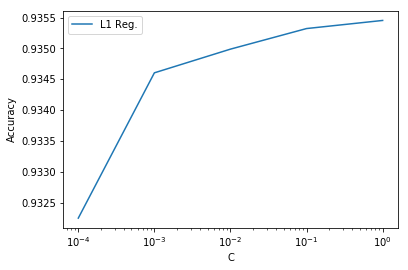

In [110]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
#plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [111]:
[(c, acc) for c, acc in zip(Cs, l1_mods)]

[(0.0001, 0.9322484728346616),
 (0.001, 0.9346049597475626),
 (0.01, 0.9349892795015979),
 (0.1, 0.9353230308669445),
 (1.0, 0.9354545086775355)]

In [112]:
best_C = 1

In [ ]:
t0 = time.time()
logistic_clf = LogisticRegression(C=best_C, penalty='l1', solver='saga', n_jobs=-1)
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
print('Elapsed time: %.2f minutes\n' % ((time.time() - t0) / 60))
print('Accuracy:', accuracy)

In [33]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

In [ ]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [35]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9576		2924
        0	2895		83788
Accuracy:  0.9413306715868647
Precision: 0.7678614385374067
Recall:    0.76608
F1:        0.7669696848344079


In [36]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9329		3171
        0	2573		84110
Accuracy:  0.9420868495609127
Precision: 0.7838178457402117
Recall:    0.74632
F1:        0.7646094582411277


In [37]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.9716972333675578


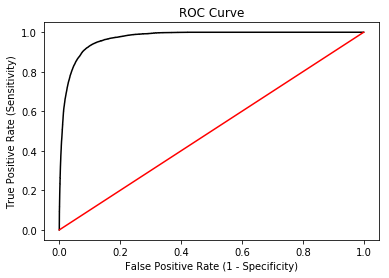

In [38]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [39]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
169,vgt,3.795878
118,lon:Jan20,-3.472720
29,etopo1,3.225612
76,lat:Jan20,-3.160094
90,lat:TMarAug,2.584997
91,lat:TOctSep,2.572835
10,OctMin,-2.572545
79,lat:Mar20,-2.315299
151,lon:vpd,-2.284083
20,Tmean,-2.279173


In [40]:
logistic_clf.predict_proba(X_train)

array([[9.99999717e-01, 2.83467116e-07],
       [9.99999458e-01, 5.42235819e-07],
       [9.99999644e-01, 3.56024298e-07],
       ...,
       [9.99983728e-01, 1.62715190e-05],
       [9.99982790e-01, 1.72096331e-05],
       [9.99984858e-01, 1.51416534e-05]])

In [41]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [42]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,Acs,AugMaxT,AugTmax,AugTmean,Jan20,JanMin,JanTmin,Mar20,MarMin,MarTmin,...,vgt,vpd,wd,winterMin,x,y,year,btl,probs,preds
0,0.0,40.320885,37.172668,28.542564,0,-7.754573,-0.617069,0,-4.906324,4.892391,...,0,387627.763293,-7.549322,-8.055787,-390000.0,-2040000.0,2015,0,2.345047e-07,0
1,0.0,40.502707,37.358329,28.728538,0,-7.831432,-0.501957,0,-4.817822,5.149851,...,0,403269.338114,-43.963725,-7.897553,-380000.0,-2040000.0,2015,0,2.140744e-07,0
2,0.0,40.605501,37.344373,28.714929,0,-7.490612,-0.537551,0,-4.754256,5.106586,...,0,404661.530622,-36.603203,-7.796747,-370000.0,-2040000.0,2015,0,2.229605e-07,0
3,0.0,40.957636,37.679187,29.100471,0,-7.406106,-0.424526,0,-4.492903,5.414470,...,0,411001.699888,-48.166563,-7.568926,-360000.0,-2040000.0,2015,0,2.044995e-07,0
4,0.0,41.064250,37.894372,29.370663,0,-7.449937,-0.320193,0,-4.192837,5.694320,...,0,419928.640474,-80.172106,-7.449937,-350000.0,-2040000.0,2015,0,1.964985e-07,0


In [43]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [44]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl')
    pred_matrix   = util.column2matrix(data_year, pred_type)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (195, 357)
matrix shape: (195, 357)


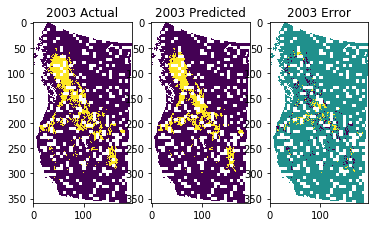

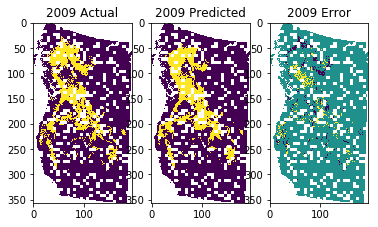

In [45]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

matrix shape: (196, 351)
matrix shape: (196, 351)
matrix shape: (192, 355)
matrix shape: (192, 355)


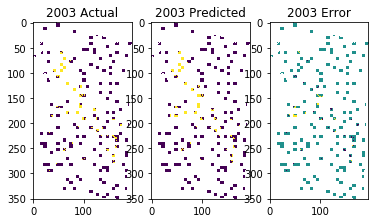

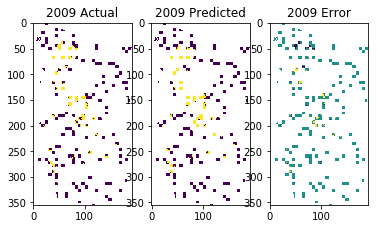

In [46]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

matrix shape: (184, 346)
matrix shape: (184, 346)
matrix shape: (196, 350)
matrix shape: (196, 350)


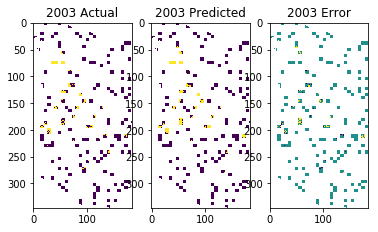

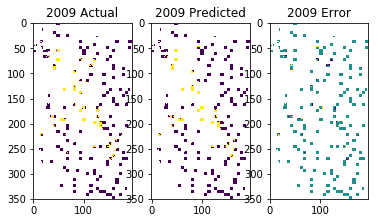

In [47]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [48]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)


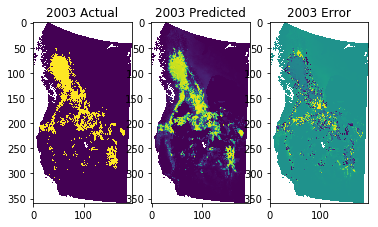

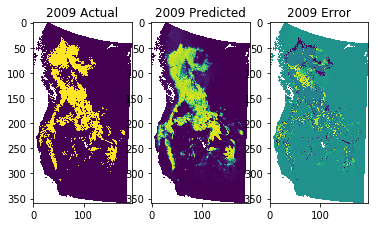

In [49]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)

In [50]:
!say "I'm done in the test model"